In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://raw.githubusercontent.com/andytaylor823/CS-4774-Final-Project/master/ALL_YEARS_ADDED_FEATURES.csv'
df = pd.read_csv(url)
df.head()

,SCHOOL_YEAR,DIV_NAME,SCH_NAME,GENDER,FEDERAL_RACE_CODE,DISABILITY_FLAG,DISADVANTAGED_FLAG,LEP_FLAG,COHORT_CNT,DIPLOMA_RATE,DROPOUT_RATE,per_capita_income,median_household_income,median_family_income,StudentNumber,STRatio,MathProficiency,ReadingProficiency
0,2007-2008,Accomack County,Arcadia High,F,3.0,Y,N,N,3,66.666667,33.333333,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0
1,2007-2008,Accomack County,Arcadia High,F,3.0,Y,Y,N,7,100.000000,0.000000,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0
2,2007-2008,Accomack County,Arcadia High,F,5.0,N,N,N,33,75.757576,9.090909,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0
3,2007-2008,Accomack County,Arcadia High,F,5.0,N,Y,N,13,46.153846,46.153846,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0
4,2007-2008,Accomack County,Arcadia High,F,5.0,Y,N,N,3,66.666667,33.333333,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72071 entries, 0 to 72070
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SCHOOL_YEAR              72071 non-null  object 
 1   DIV_NAME                 72071 non-null  object 
 2   SCH_NAME                 72071 non-null  object 
 3   GENDER                   72071 non-null  object 
 4   FEDERAL_RACE_CODE        72071 non-null  float64
 5   DISABILITY_FLAG          72071 non-null  object 
 6   DISADVANTAGED_FLAG       72071 non-null  object 
 7   LEP_FLAG                 72071 non-null  object 
 8   COHORT_CNT               72071 non-null  int64  
 9   DIPLOMA_RATE             72071 non-null  float64
 10  DROPOUT_RATE             72071 non-null  float64
 11  per_capita_income        72071 non-null  float64
 12  median_household_income  72071 non-null  float64
 13  median_family_income     72071 non-null  float64
 14  StudentNumber         

In [3]:
df['yrs_since_07'] = np.array([int(y[:4])-2007 for y in df['SCHOOL_YEAR']])
df.head()

,SCHOOL_YEAR,DIV_NAME,SCH_NAME,GENDER,FEDERAL_RACE_CODE,DISABILITY_FLAG,DISADVANTAGED_FLAG,LEP_FLAG,COHORT_CNT,DIPLOMA_RATE,DROPOUT_RATE,per_capita_income,median_household_income,median_family_income,StudentNumber,STRatio,MathProficiency,ReadingProficiency,yrs_since_07
0,2007-2008,Accomack County,Arcadia High,F,3.0,Y,N,N,3,66.666667,33.333333,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0,0
1,2007-2008,Accomack County,Arcadia High,F,3.0,Y,Y,N,7,100.000000,0.000000,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0,0
2,2007-2008,Accomack County,Arcadia High,F,5.0,N,N,N,33,75.757576,9.090909,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0,0
3,2007-2008,Accomack County,Arcadia High,F,5.0,N,Y,N,13,46.153846,46.153846,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0,0
4,2007-2008,Accomack County,Arcadia High,F,5.0,Y,N,N,3,66.666667,33.333333,22766.0,41372.0,49727.0,603.0,14.0,74.0,77.0,0


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(['DIPLOMA_RATE', 'DROPOUT_RATE'], axis=1)
y = (df['DROPOUT_RATE']*df['COHORT_CNT']/100).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=623)
# they're all still dataframe objects

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder # converts ['N', 'Y'] into [0, 1]
scale_cols = ['COHORT_CNT', 'per_capita_income', 'median_household_income', 'median_family_income',
              'StudentNumber', 'STRatio', 'MathProficiency', 'ReadingProficiency']
binary_code_cols = ['GENDER', 'DISABILITY_FLAG', 'DISADVANTAGED_FLAG', 'LEP_FLAG']
onehotcols = ['FEDERAL_RACE_CODE']
drop_cols = ['SCHOOL_YEAR', 'DIV_NAME', 'SCH_NAME']

pipeline = ColumnTransformer([
    ('scale', StandardScaler(), scale_cols),
    ('binary_code', OrdinalEncoder(), binary_code_cols),
    ('onehot', OneHotEncoder(), onehotcols),
    ('drop some', 'drop', drop_cols)
])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train_scaled.shape, X_test_scaled.shape

((57656, 19), (14415, 19))

In [6]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(19, activation='relu', input_shape=X_train_scaled.shape[1:]))
for i in range(15, 3, -2):
    model.add(keras.layers.Dense(i, activation='relu'))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                300       
_________________________________________________________________
batch_normalization (BatchNo (None, 15)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 13)                208       
_________________________________________________________________
batch_normalization_1 (Batch (None, 13)                52        
_________________________________________________________________
dense_3 (Dense)              (None, 11)                154       
_________________________________________________________________
batch_normalization_2 (Batch (None, 11)                4

In [7]:
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)
history = model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2)

Train on 46124 samples, validate on 11532 samples
Epoch 1/20
46124/46124 [==============================] - 24s 515us/sample - loss: 3.8435 - val_loss: 3.1176
Epoch 2/20
46124/46124 [==============================] - 16s 350us/sample - loss: 3.0347 - val_loss: 2.8153
Epoch 3/20
46124/46124 [==============================] - 18s 382us/sample - loss: 2.7901 - val_loss: 2.3527
Epoch 4/20
46124/46124 [==============================] - 17s 360us/sample - loss: 2.6105 - val_loss: 2.2940
Epoch 5/20
46124/46124 [==============================] - 16s 352us/sample - loss: 2.5095 - val_loss: 2.2665
Epoch 6/20
46124/46124 [==============================] - 17s 364us/sample - loss: 2.4251 - val_loss: 2.2838
Epoch 7/20
46124/46124 [==============================] - 16s 354us/sample - loss: 2.4004 - val_loss: 2.2768
Epoch 8/20
46124/46124 [==============================] - 17s 367us/sample - loss: 2.3593 - val_loss: 2.0831
Epoch 9/20
46124/46124 [==============================] - 17s 359us/sample - l

In [15]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

1.4504632055875488


In [23]:
ys = model.predict(X_test_scaled[100:110])
print(np.round(ys)[:,0])
print(y_test[100:110])

[1. 0. 0. 6. 1. 3. 0. 2. 0. 0.]
[0. 0. 0. 2. 1. 5. 0. 1. 0. 0.]


In [18]:
y_test[:20]

array([0., 1., 1., 0., 0., 0., 2., 1., 0., 0., 0., 0., 2., 2., 0., 1., 2.,
       1., 1., 0.])

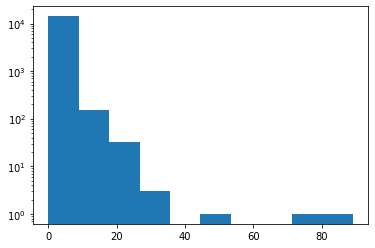

In [27]:
plt.hist(y_test)
plt.yscale('log')
plt.show()

In [29]:
sum(y_test==0), len(y_test)

(8869, 14415)

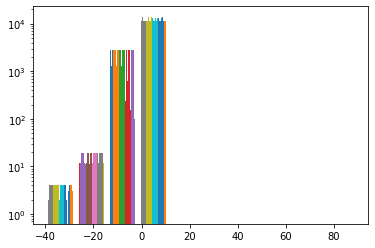

In [30]:
plt.hist(y_test-y_pred)
plt.yscale('log')
plt.show()